### **Saudi Arabia Used Cars**

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### **Business Problem Understanding**

**Context**

Syarah adalah sebuah platform online yang khusus menjual mobil bekas dan baru, platform ini memberikan pengalaman pembelian online yang lancar dan nyaman bagi pelanggan. Melalui platform itu, pelanggan dapat menelusuri dan membeli mobil dari ponsel mereka tanpa kesulitan dan perusahaan mengirimkan mobil ke rumah mereka. Aplikasi ini menawarkan manfaat garansi komprehensif untuk mobil bekas. Mobil bekas diperiksa lebih dari 200 poin, dengan garansi satu tahun, dan yang terpenting adalah jaminan pengembalian dalam 10 hari sehingga pelanggan dapat mencoba mobil tersebut. dan jika pelanggan tidak menyukainya, mereka dapat mengembalikannya tanpa alasan apa pun. Kantor pusat kami berada di ibu kota Saudi - Riyadh, dan layanan kami mencakup seluruh wilayah Kerajaan. 

Syarah menjual mobil bekasnya ke pelanggan dengan harga yang beragam, dan ini tentu menyulitkan untuk menentukan harga jual yang wajar bagi pelanggan dan di sisi lain menguntungkan juga bagi perusahaan. Banyak faktor yang mempengaruhi harga dari mobil bekas, sehingga hal ini perlu dipahami oleh perusahaan karena berhubungan dengan profit yang didapatkan.    

 

**Problem Statement**

Salah satu tantangan terbesar bagi perusahaan seperti Syarah adalah pemecahan masalah untuk dapat memiliki model bisnis yang menguntungkan bagi perusahaan, tetapi di sisi lain juga memberikan pengalaman yang menyenangkan bagi pelanggan saat membeli mobil.

Mengingat Syarah memegang kendali penuh untuk menentukan harga jual, maka cara untuk menentukan harga jual berdasarkan berbagai faktor agar tetap kompetitif dengan kompetitor sangatlah penting.  

**Goals**

Berdasarkan permasalahan tersebut, Syarah tentu perlu memiliki alat yang dapat memprediksi serta membantu perusahaan untuk dapat menentukan harga jual mobil yang tepat untuk ditawarkan ke pelanggan. Adanya  berbagai fitur yang terdapat pada suatu mobil bekas, seperti type mobil, produsen mobil, type transmisi, tahun dan kilometer/jarak tempuh mobil dapat menambah keakuratan prediksi harga jual, yang mana dapat mendatangkan profit perusahaan, dan juga tentunya masih wajar bagi pelanggan.

Bagi Syarah, prediction tool yang dapat memberikan prediksi harga jual secara wajar tentu dapat meningkatkan jumlah pelanggan yang tertarik membeli mobil bekas. Dengan kata lain, semakin banyak pelanggan yang tertarik untuk membeli mobil maka dapat meningkatkan laba dari perusahaan 

**Analytic Approach**

Kita akan membangun suatu model regresi yang akan membantu perusahaan untuk dapat menyediakan 'tool' prediksi harga jual mobil bekas, yang mana akan berguna bagi perusahaan dalam menentukan harga jual mobil bekas.

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah MAE dan MAPE. Dimana MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai MAE dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga jual mobil sesuai dengan limitasi fitur yang digunakan. 



### **Data Understanding**

- Dataset merupakan data harga jual mobil bekas di Syarah.
- Setiap baris data merepresentasikan informasi terkait detail dari mobil yang akan dijual beserta harganya.


**Attributes Information**

| **Atribut** | **Tipe Data** | **Deskripsi** |
| --- | --- | --- |
| Type | Object | Type dari mobil bekas |
| Region | Object | Wilayah dari mobil bekas |
| Make | Object | Produsen Mobil |
| Gear_Type | Object | Tipe Transmisi |
| Origin | Object | Asal dari mobil bekas |
| Options | Object | Opsi aksesoris dari mobil bekas |
| Year | Integer | Tahun produksi |
| Engine Size | Float | Ukuran mesin dari mobil bekas |
| Mileage | Integer | Kilometer tempuh dari mobil bekas |
| Negotiable | Bool | True jika harga jualnya 0, artinya dapat nego |
| Price | Integer | Harga jual mobil bekas |

<br>

In [201]:
# Library
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')



In [202]:
# Load dataset
df = pd.read_csv('data_saudi_used_cars.csv')
df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000


### **Data Preprocessing**

Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk proses analisis selanjutnya. Hal yang perlu dilakukan seperti drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.

**Duplikat Data**

In [203]:
# Cek Data Duplikat
duplikat = df[df.duplicated()]
df.duplicated().sum()

4

Terdapat 4 data duplikat

Duplikat Data di drop sehingga tidak ada data yang sama

In [204]:
# Hapus data Duplikat
df = df.drop_duplicates()

**Missing Value**

In [205]:
# Cek nilai missing value
df.isnull().sum()

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64

Setelah dicek, tidak ada missing value 

In [206]:
# Cek info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5620 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5620 non-null   object 
 1   Region       5620 non-null   object 
 2   Make         5620 non-null   object 
 3   Gear_Type    5620 non-null   object 
 4   Origin       5620 non-null   object 
 5   Options      5620 non-null   object 
 6   Year         5620 non-null   int64  
 7   Engine_Size  5620 non-null   float64
 8   Mileage      5620 non-null   int64  
 9   Negotiable   5620 non-null   bool   
 10  Price        5620 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 488.5+ KB


**Drop Columns**

Diperlukan adanya pertimbangan sebelum melakukan drop pada kolom atau fitur. Sebagai pertimbangan, pada tahap awal ini kita bisa menggunakan domain knowledge untuk memutuskan kira-kira fitur mana saja yang dirasa tidak memiliki relevansi.
Jika ditinjau berdasar domain knowledge, fitur Negotiable tidak memiliki relevansi dan kepentingan untuk analisis prediktif.



In [207]:
# Drop Kolom Negotiable
df.drop(columns=['Negotiable'],inplace=True)


In [208]:
df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,0
...,...,...,...,...,...,...,...,...,...,...
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,68000
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,0
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,145000
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,154000


In [209]:
# Variabel untuk korelasi matrix
df_num = df[['Year','Engine_Size','Mileage','Price']]


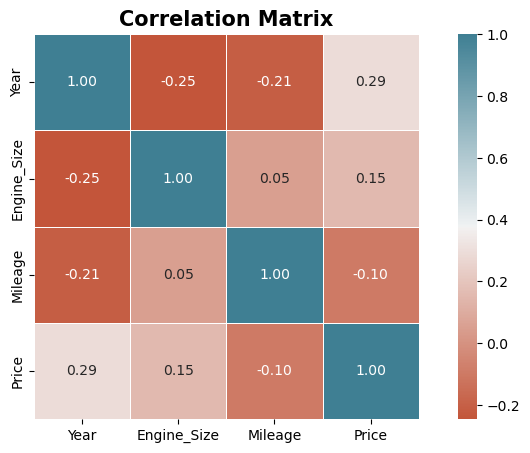

In [210]:
# Korelasi matrix 
plt.figure(figsize=(10, 5))
palette=sns.diverging_palette(20, 220, n=256)
corr = df_num.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=0.5)
plt.title('Correlation Matrix', size=15, weight='bold');
plt.show()

 
Correlation matrix menunjukkan bahwa fitur Year memiliki korelasi yang paling kuat terhadap fitur price, di mana korelasinya adalah korelasi positif Ini berarti semakin tinggi tahun maka harganya akan semakin tinggi. Fitur Mileage memiliki korelasi negatif dengan Price, dimana semakin tinggi Mileage maka semakin berkurang Pricenya.

**Mendeteksi Outliers**



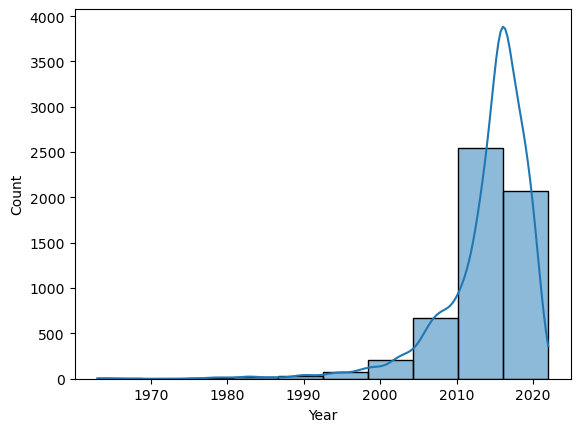

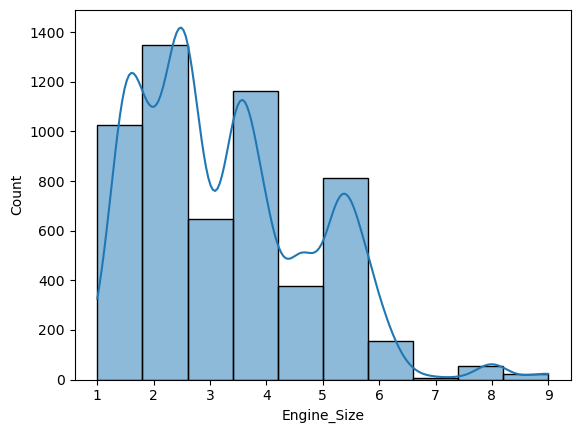

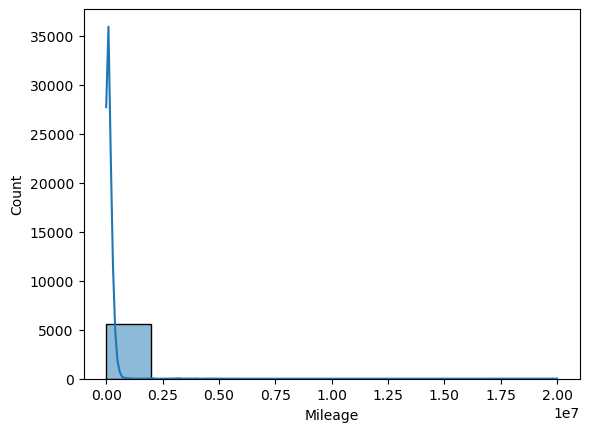

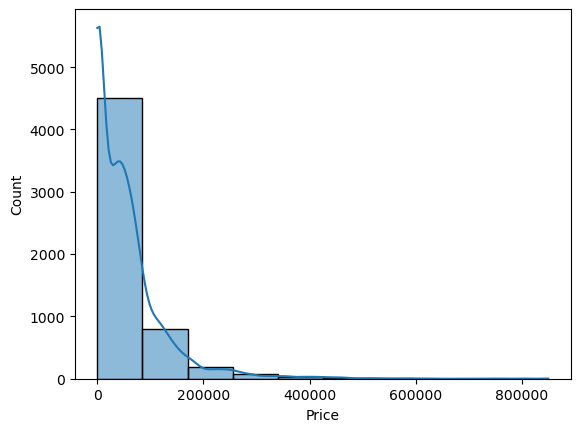

In [211]:
feature = ['Year', 'Engine_Size', 'Mileage', 'Price']

for i in feature:
    plt.figure()
    sns.histplot(data = df, x = i, bins =10, kde=True)
  
plt.show()


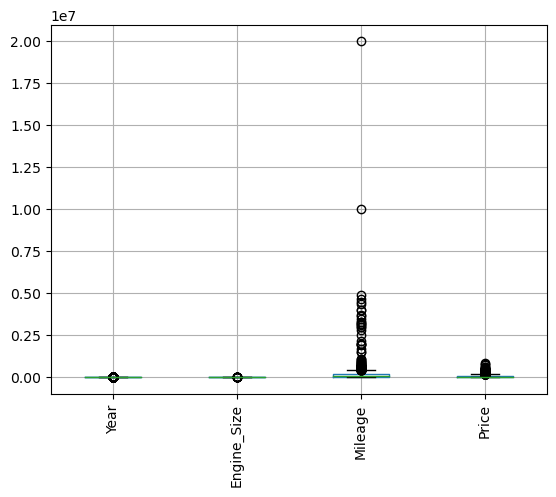

In [212]:
# Plot boxplot untuk mengecek outliers
df.boxplot(rot=90); 


Terlihat outliers di beberapa fitur seperti Mileage dan Price  

In [213]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')       

In [214]:
# Outliers pada Mileage
find_anomalies(df['Mileage'])

IQR: 158000.0
limit_bawah: -199000.0
limit_atas: 433000.0


In [215]:
# Outliers pada Price
find_anomalies(df['Price'])

IQR: 73000.0
limit_bawah: -109500.0
limit_atas: 182500.0


In [216]:
# Cek deskriptif statistik kolom Mileage
df['Mileage'].describe()

count    5.620000e+03
mean     1.509222e+05
std      3.829633e+05
min      1.000000e+02
25%      3.800000e+04
50%      1.030000e+05
75%      1.960000e+05
max      2.000000e+07
Name: Mileage, dtype: float64

**Mileage**

In [217]:
# Cek Mileage > 433.000

df[df['Mileage']>433000].count()['Mileage']

175

Terlihat bahwa 75% data pada kolom Mileage bernilai kurang sama dengan dari 196.000, sedangkan nilai maksimalnya adalah 20.000.000. Terdapat 175 data yang nilai Mileage-nya lebih besar dari 433.000 (batas atas berdasarkan metode IQR). Oleh karena itu, data yang memiliki Mileage lebih besar dari 433.000 tidak akan dimasukkan ke dalam pemodelan. Hal ini akan menjadi limitasi untuk model yang nantinya dibangun. 

In [218]:
# Melakukan filtering pada Mileage
df = df[(df['Mileage'] <= 433000)]

In [219]:
# Cek deskriptif statistik kolom Mileage setelah filtering
df['Mileage'].describe()

count      5445.000000
mean     120837.380349
std      102753.937014
min         100.000000
25%       35449.000000
50%       99000.000000
75%      183541.000000
max      433000.000000
Name: Mileage, dtype: float64

**Price**

Dikarenakan tujuan dari Regresi Analisis adalah untuk memprediksi harga jual dari mobil, disamping harga jual mobil negotiable atau tidak, data yang dibutuhkan haruslah jelas definisinya(bukan 0). Karena itu, data dengan harga jual 0 akan dihapus.

In [220]:
# Filter Harga tidak sama dengan 0
df = df[df['Price'] != 0] 

In [221]:
# Cek deskriptif statistik kolom Price
df['Price'].describe()

count      3742.000000
mean      78887.438001
std       72888.879945
min           1.000000
25%       36000.000000
50%       58000.000000
75%       95000.000000
max      850000.000000
Name: Price, dtype: float64

In [222]:
# Cek Price > 182.500

df[df['Price']>182500].count()['Price']

260

In [223]:
# Melakukan filtering pada Price
df = df[(df['Price']>=34000) & (df['Price'] <=182500)]


Terdapat angka 1 di kolom Price dan ini tidak masuk akal, sehingga ditetapkan minimum dari harga jual terendahnya adalah 34.000 yang didasarkan pada kisaran harga terendah dari website [kavak](https://kavak.com/gcc/sa-en/buy?s=lp)

In [224]:
df.describe() 

,Year,Engine_Size,Mileage,Price
count,2652.000000,2652.000000,2652.000000,2652.000000
mean,2015.843137,3.261388,116258.565234,76766.144042
std,3.592751,1.394696,87959.737884,35703.127559
min,1964.000000,1.000000,100.000000,34000.000000
25%,2015.000000,2.400000,52747.500000,49500.000000
50%,2016.000000,3.000000,99000.000000,66000.000000
75%,2018.000000,4.000000,166454.000000,95000.000000
max,2021.000000,9.000000,425000.000000,182000.000000


Terlihat bahwa 75% data pada kolom Price bernilai kurang sama dengan 95.000, sedangkan nilai maksimalnya adalah 850.000. Terdapat 260 data yang nilai Price-nya lebih besar dari 182.500 (batas atas berdasarkan metode IQR). Oleh karena itu, data yang memiliki Price lebih besar dari 182.500 tidak akan dimasukkan ke dalam pemodelan. Hal ini akan menjadi limitasi untuk model yang nantinya dibangun. 

In [225]:
# Cek deskriptif statistik kolom Price setelah filtering
df['Price'].describe()

count      2652.000000
mean      76766.144042
std       35703.127559
min       34000.000000
25%       49500.000000
50%       66000.000000
75%       95000.000000
max      182000.000000
Name: Price, dtype: float64

In [226]:
# Cek kembali info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2652 entries, 1 to 5622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         2652 non-null   object 
 1   Region       2652 non-null   object 
 2   Make         2652 non-null   object 
 3   Gear_Type    2652 non-null   object 
 4   Origin       2652 non-null   object 
 5   Options      2652 non-null   object 
 6   Year         2652 non-null   int64  
 7   Engine_Size  2652 non-null   float64
 8   Mileage      2652 non-null   int64  
 9   Price        2652 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 227.9+ KB


Pada akhirnya tersisa 2.652 baris data dari 5624 baris data hasil dari data cleaning

### **Data Modelling**

In [227]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, AdaBoostRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.svm import SVR

from sklearn.preprocessing import RobustScaler,StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

**Encoding**

In [228]:
df.columns 

Index(['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options', 'Year',
       'Engine_Size', 'Mileage', 'Price'],
      dtype='object')

In [229]:
# Mengubah fitur kategorikal menjadi numerikal dan menyamakan skala

transformer = ColumnTransformer([
    ('scaler', RobustScaler(),['Year','Engine_Size','Mileage']),
    ('One Hot', OneHotEncoder(), ['Gear_Type','Origin','Options']),
    ('Binary', ce.BinaryEncoder(), ['Region','Make','Type'])
], remainder='passthrough') 


**Data Splitting**

In [230]:
# Memisahkan independen variabel dengan target
x = df[['Year','Engine_Size','Mileage','Gear_Type','Region','Origin','Options','Make','Type']]
y = df['Price'] 

**Train and Test Splitting**

In [231]:
# Splitting data training dan test dengan proporsi 80:20
x_train, x_test, y_train, y_test= train_test_split(  
    x,
    y,  
    test_size=0.2,
    random_state=2024)

**Choose a Benchmark Model**

In [232]:
# Model Benchmarking
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=2024)
rf = RandomForestRegressor(random_state=2024)
xgb = XGBRegressor(random_state=2024)
svr = SVR(kernel='linear')
ada = AdaBoostRegressor(random_state = 2024)
gbr = GradientBoostingRegressor(random_state = 2024)


In [233]:
# Cross Validation
models = [lr, knn, dt, xgb, rf, svr, ada, gbr]

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('modela', i)
    ])

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)
    
    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-20753.17647059 -19689.28301887 -20837.8490566  -19498.66509434
 -19634.25707547] LinearRegression()
[-0.31108506 -0.26714405 -0.30680271 -0.28595101 -0.28219841] LinearRegression()
[-16192.936      -15643.91037736 -14941.50943396 -13406.15613208
 -14506.79009434] KNeighborsRegressor()
[-0.23465704 -0.20975857 -0.21828377 -0.19289496 -0.21201083] KNeighborsRegressor()
[-20090.35294118 -16841.98113208 -19485.8490566  -16751.98349057
 -18066.98349057] DecisionTreeRegressor(random_state=2024)
[-0.28710413 -0.23062687 -0.26835182 -0.23511182 -0.25230635] DecisionTreeRegressor(random_state=2024)
[-13320.68547794 -13094.98863594 -13676.72666384 -12127.22031158
 -12363.67299897] XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, i

[-14453.07308235 -12940.3472664  -14090.12930818 -11961.86922956
 -12784.29575472] RandomForestRegressor(random_state=2024)
[-0.21794317 -0.17146306 -0.2034534  -0.17357157 -0.18248449] RandomForestRegressor(random_state=2024)
[-27202.73798205 -28125.11467116 -26071.52851046 -26403.97960217
 -27388.62874708] SVR(kernel='linear')
[-0.35834469 -0.33323692 -0.33752415 -0.33971322 -0.35264082] SVR(kernel='linear')
[-22835.17859154 -22832.76036684 -23974.35526201 -23810.44103057
 -24007.67148638] AdaBoostRegressor(random_state=2024)
[-0.37228189 -0.3529575  -0.39759744 -0.39063291 -0.39505447] AdaBoostRegressor(random_state=2024)
[-15962.36839281 -14495.4309918  -14782.77875065 -14061.19281569
 -14439.22994563] GradientBoostingRegressor(random_state=2024)
[-0.23232902 -0.19033319 -0.20935467 -0.19987126 -0.20301006] GradientBoostingRegressor(random_state=2024)


In [234]:
# Evaluasi hasil dari 8 kandidat algoritma yang digunakan

Z = pd.DataFrame({
    'Modela': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor','SVR','Gradient Boost Regressor','Ada Boost Regressor'],
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

Z.sort_values('Mean_MAPE',ascending=False)

,Modela,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
3,RandomForest Regressor,-12916.658818,583.395006,-0.185297,0.012129
4,XGBoost Regressor,-13245.942928,908.313375,-0.189783,0.018064
7,Ada Boost Regressor,-14748.200179,649.112334,-0.206980,0.014083
1,KNN Regressor,-14938.260408,959.757617,-0.213521,0.013500
2,DecisionTree Regressor,-18247.430022,1354.566680,-0.254700,0.021002
0,Linear Regression,-20082.646143,585.963058,-0.290636,0.016276
5,SVR,-27038.397903,730.471853,-0.344292,0.009552
6,Gradient Boost Regressor,-23492.081347,541.479380,-0.381705,0.016886


Dikarenakan Nilai Mean MAE dan Mean MAPE pada Random Forest dan XGBoost Regressor paling kecil, maka dapat disimpulkan bahwa kedua model ini adalah model terbaik.

Selanjutnya, akan dilakukan prediksi pada test set dengan 2 benchmark model terbaik, yaitu XGBoost dan Random Forest. 


**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model Random Forest Regressor dan XGBoost Regressor

In [235]:
# Benchmark 2 model terbaik
models = {
'Random Forest' : RandomForestRegressor(random_state=2024),
'XGBoost Regressor'           : XGBRegressor(random_state=2024,verbosity = 0)
}


score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('modela', models[i])
        ])

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({ 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,MAE,MAPE
Random Forest,12323.682750,0.176527
XGBoost Regressor,11574.599488,0.162942


Ketika dilakukan prediksi pada test set, performa XGBoost secara keseluruhan lebih baik. Hal ini dapat dilihat dari nilai MAE dan MAPE yang lebih rendah dari Random Forest .

**Hyperparameter Tuning**

Karena model XGBoost memiliki performa yang lebih baik dari Random Forest, maka selanjutnya kita akan menggunakan model XGBoost ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

In [236]:


# Mendefinisikan steps pipeline 
pipeline = Pipeline(steps=[
    ('preprocessor', transformer), 
    ('regressor', XGBRegressor(random_state=2024, verbosity = 0))
])

learning_rate =[0.001,0.01,0.1]
n_estimators=[100,200,300]
max_depth=[3,4,5]
gamma=[0,1,2]
subsample=[0.8,0.9,1.0]
colsample_bytree=[0.8,0.9,1.0]

# Mendefinisikan parameters 
parameters = {
    'regressor__learning_rate' : learning_rate,
    'regressor__n_estimators' : n_estimators,
    'regressor__max_depth' :max_depth,
    'regressor__gamma' : gamma,
    'regressor__subsample' : subsample,
    'regressor__colsample_bytree': colsample_bytree
   
}

cvfold = KFold(n_splits = 5,shuffle = True, random_state = 2024)

# Melakukan hyperparameter tuning menggunakan GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=parameters,
    cv=cvfold,
    scoring=['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    n_jobs=-1,
    refit='neg_mean_absolute_error',
)




In [237]:
# Fit model XGBoost
grid_search.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=2024, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         RobustScaler(),
                                                                         ['Year',
                                                                          'Engine_Size',
                                                                          'Mileage']),
                                                                        ('One '
                                                                         'Hot',
                                                                         OneHotEncoder(),
                                                                         ['Gear_Type',
                                                                          'Origin',
                                                                          'Options']),
                                                                        ('Binary',
                                                                         BinaryEncoder(),
                                                                         ['Region',
                                                                          'Make',
                                                                          'Type'])])),
                                       ('regressor...
             n_jobs=-1,
             param_grid={'regressor__colsample_bytree': [0.8, 0.9, 1.0],
                         'regressor__gamma': [0, 1, 2],
                         'regressor__learning_rate': [0.001, 0.01, 0.1],
                         'regressor__max_depth': [3, 4, 5],
                         'regressor__n_estimators': [100, 200, 300],
                         'regressor__subsample': [0.8, 0.9, 1.0]},
             refit='neg_mean_absolute_error',
             scoring=['neg_mean_absolute_error',
                      'neg_mean_absolute_percentage_error'])

In [238]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan MAE & MAPE
pd.DataFrame(grid_search.cv_results_).sort_values(by=['rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__colsample_bytree,param_regressor__gamma,param_regressor__learning_rate,param_regressor__max_depth,param_regressor__n_estimators,param_regressor__subsample,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
321,0.443735,0.023650,0.029623,0.003201,0.9,0,0.1,5,300,0.8,...,667.000142,1,-0.184914,-0.173106,-0.174667,-0.171547,-0.171076,-0.175062,0.005085,1
402,0.456521,0.048391,0.027635,0.003844,0.9,1,0.1,5,300,0.8,...,667.000142,1,-0.184914,-0.173106,-0.174667,-0.171547,-0.171076,-0.175062,0.005085,1
483,0.455656,0.020364,0.032436,0.007641,0.9,2,0.1,5,300,0.8,...,667.000142,1,-0.184914,-0.173106,-0.174667,-0.171547,-0.171076,-0.175062,0.005085,1
79,0.423049,0.015885,0.034342,0.007757,0.8,0,0.1,5,300,0.9,...,771.566758,4,-0.185191,-0.177513,-0.176918,-0.168555,-0.170174,-0.175670,0.005940,4
160,0.443274,0.027249,0.027945,0.003822,0.8,1,0.1,5,300,0.9,...,771.566758,4,-0.185191,-0.177513,-0.176918,-0.168555,-0.170174,-0.175670,0.005940,4


In [239]:
# Print nilai Terbaik
print("XGBoost")
print("Best Score:", grid_search.best_score_)

# Mendapatkan parameter terbaik
best_params = grid_search.best_params_ 

# Print best parameters
print("Best Parameters:", best_params)

XGBoost
Best Score: -12282.851134702762
Best Parameters: {'regressor__colsample_bytree': 0.9, 'regressor__gamma': 0, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__n_estimators': 300, 'regressor__subsample': 0.8}


**Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [240]:
# Model XGBoost
model = {'XGBoost Regressor': XGBRegressor(random_state=2024, verbosity = 0)}

# Define model terhadap estimator terbaik
best_model = grid_search.best_estimator_

# Fitting model
grid_search.fit(x_train, y_train)

# Predict test set
y_pred_xgb_tuning = best_model.predict(x_test)

# Simpan nilai metrics MAE & MAPE setelah tuning
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({ 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning





,MAE,MAPE
XGBoost Regressor,11119.616231,0.159739


**Performance Comparison**

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [241]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGBoost Regressor']).T

,MAE,MAPE
XGBoost Regressor,11574.599488,0.162942


In [242]:
# Setelah hyperparameter tuning
score_after_tuning 

,MAE,MAPE
XGBoost Regressor,11119.616231,0.159739


Model mengalami peningkatan performa (nilai MAE & MAPE sedikit berkurang) setelah dilakukannya hyperparameter tuning.
- MAE & MAPE sebelum tuning: 11.574, 0.162
- MAE & MAPE setelahh tuning: 11.119, 0.159

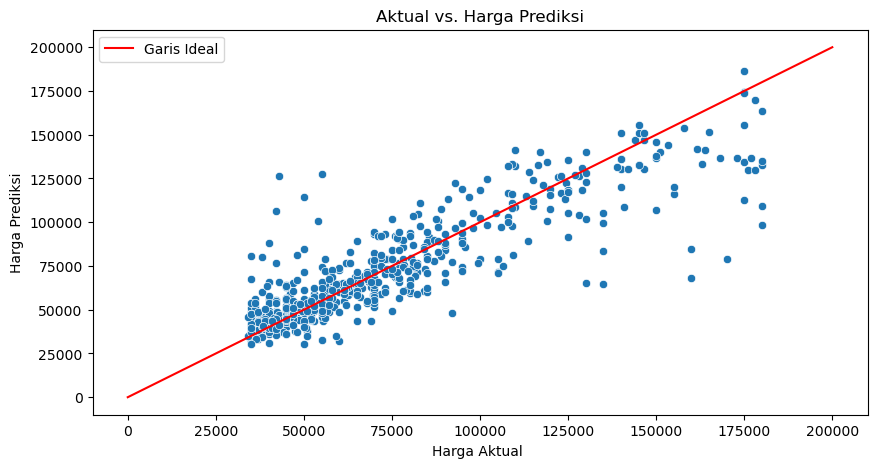

In [243]:
plt.figure(figsize=(10, 5))
plot = sns.scatterplot(x=y_test, y=y_pred).set(title='Aktual vs. Harga Prediksi', 
                                               xlabel='Harga Aktual ', 
                                               ylabel='Harga Prediksi');

sns.lineplot(x=list(np.arange(0,200000)), y=list(np.arange(0,200000)), color='red',label='Garis Ideal')
plt.legend()
plt.show()

Dari plot di atas dapat dilihat bahwa kebanyakan prediksi cukup dekat dengan garis ideal, walaupun ada beberapa prediksi yang jauh dari garis, terutama di harga yang tinggi(75.000) ke atas . Dengan nilai MAPE di 15.9%, jika melihat dari sumber, dapat disimpulkan termasuk ke dalam kategori model bagus.

[Sumber](https://stephenallwright.com/good-mape-score/)

### **Conclusion** 


- Metrik evaluasi yang digunakan pada model adalah nilai MAE & MAPE. Jika ditinjau dari nilai MAPE yang dihasilkan oleh model setelah dilakukan hyperparameter tuning, yaitu sebesar 15.97%, kita dapat menyimpulkan bahwa bila nanti model yang kita buat ini digunakan untuk memperkirakan harga jual mobil bekas pada rentang nilai seperti yang dilatih terhadap model (maksimal harga 182.500 SAR), maka perkiraan harganya rata-rata akan meleset kurang lebih sebesar 15.97% dari harga seharusnya. 

- Model XGBoost adalah model terbaik dimana nilai MAE dan MAPE sebelum tuning di sekitar 11.574 dan 16.29 %, setelah melalui proses hyperparameter tuning, dapat ditingkatkan ke sekitar 11.119 dan 15.97 %

- Best Parameters:
colsample_bytree: 0.9,
gamma: 0, 
learning_rate': 0.1,
max_depth': 5,
n_estimators': 300, 
subsample': 0.8
 
 - Tetapi, tidak menutup kemungkinan juga ada prediksi yang meleset karena masih adanya sedikit bias yang dihasilkan model bila dilihat antara harga aktual dan prediksi. Bias yang dihasilkan oleh model ini dikarenakan oleh terbatasnya fitur pada dataset yang bisa merepresentasikan mobil seperti tipe body mobil(hatchback,SUV,Sedan dll) dan fitur mobil(parking sensor, camera, hill start assist dll).
 

### **Recommendation**

  
Berikut poin-poin yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti:
- Jika memungkinkan, penambahan fitur yang lebih korelatif dengan target ('price'), seperti tipe body mobil dan fitur mobil. Selain itu, adanya penambahan data terbaru untuk Syarah tentu akan dapat mengimprovisasi kapasitas prediksi dari model.
- Mendiskusikan dengan user / stakeholders sehingga dapat lebih terarah untuk proses pengembangan modelnya. 
-  Lakukan A/B testing untuk menguji tingkat efektivitas dan ketepatan model terhadap harga mobil bekas jika dibandingkan dengan user yang menentukan harga jual mobil bekas.
- Kumpulkan data yang lebih banyak untuk melatih model


### **Save Model**

In [244]:
import pickle

# best model
xgb_tune = grid_search.best_estimator_
xgb_tune

# fit
xgb_tune.fit(x,y)

# save 
pickle.dump(xgb_tune, open('model_xgb.sav', 'wb'))


In [245]:
# Load model
model_loaded = pickle.load(open('model_xgb.sav', 'rb'))
model_loaded 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', RobustScaler(),
                                                  ['Year', 'Engine_Size',
                                                   'Mileage']),
                                                 ('One Hot', OneHotEncoder(),
                                                  ['Gear_Type', 'Origin',
                                                   'Options']),
                                                 ('Binary', BinaryEncoder(),
                                                  ['Region', 'Make',
                                                   'Type'])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=...
                              feature_types=None, gamma=0, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=300, n_jobs=None,
                              num_parallel_tree=None, random_state=2024, ...))])